# Retail : Stores Performance Appraisal

## Introduction

### Goals :

This project aims to evaluate the stores performance appraisal, to figure out any aspects might need to be improved, particularly for the stores with the least performance appraisal. 

### Steps :

- Generate Information of Datasets
- Data Preprocessing
- Exploratory Data Analysis
- Hypothesis Testing
- Conclusion

## General Information

Import Python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import math as mt
import math
import numpy as np
import seaborn as sns
from plotly import graph_objects as go
from datetime import datetime

Read the datasets.

In [2]:
try :
    retail = pd.read_csv('retail_dataset_us.csv')
    price = pd.read_csv('product_codes_us.csv', sep=';')

except :
    retail = pd.read_csv('/datasets/retail_dataset_us.csv')
    price = pd.read_csv('/datasets/product_codes_us.csv', sep=';')

### Retail Table

Checking general information of the first dataset, consist of :
- purchaseId
- item_ID
- purchasedate
- Quantity : number of items purchased
- CustomerID
- ShopID
- loyalty_program : customers' status as a member of a loyalty program or not

In [3]:
retail.info()
retail.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


(105335, 7)

In [4]:
retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [5]:
retail.describe()

,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


Findings :

1. There are missing values in column `CustomerID`
2. Columns `purchasedate` are in incorrect data type
3. Some of columns' name written in uppercase
4. There are item quantity <= `0` items

### Price Table

Checking general information of the second dataset, consist of :
- productID
- price_per_one

In [6]:
price.info()
price.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


(3159, 2)

In [7]:
price.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [8]:
price.describe()

,price_per_one
count,3159.000000
mean,2.954495
std,7.213808
min,0.000000
25%,0.650000
50%,1.450000
75%,3.290000
max,175.000000


Findings :

1. There are no missing values found, but there are `$ 0` in column `price_per_one`   
2. Columns are in correct data type
3. Column `productID` written in uppercase

Those issues found on both above datasets will be analyzed further and be fixed on the next stage, data preprocessing

## Data Preprocessing

1. Fixing column name on both datasets

In [9]:
retail = retail.rename(columns={'purchaseid': 'purchase_id', 
                                'item_ID': 'item_id',
                                'Quantity': 'quantity', 
                                'purchasedate': 'purchase_date', 
                                'CustomerID': 'customer_id', 
                                'ShopID': 'shop_id'})

In [10]:
price = price.rename(columns={'productID': 'item_id'})

2. Fixing data type of table Retail

In [11]:
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'], format='%Y/%m/%d %H:%M:%S')

3. Checking duplicated values

In [12]:
retail.duplicated().sum()

1033

In [13]:
duplicate = (retail.duplicated().sum() / retail.shape[0]) * 100

print('Duplicates percentage :', duplicate)

Duplicates percentage : 0.9806806854321926


In [14]:
price.duplicated().sum()

0

There are 1033 duplicated rows found on Retail table. As it is small amount of rows (0.98 %) compare to total rows, duplicated values will be removed.

In [15]:
retail = retail.drop_duplicates().reset_index(drop=True)
retail.duplicated().sum()

0

4. Checking & fixing missing values

In [16]:
retail.isna().sum()

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36148
loyalty_program        0
shop_id                0
dtype: int64

In [17]:
price.isna().sum()

item_id          0
price_per_one    0
dtype: int64

There are no missing values on Price table, but there are 36148 missing values on column `customer_id` in Retail table.
Missing values will be filled as unique values, according to their each purchase_id.

In [18]:
nan_count = retail['customer_id'].isna().sum()

start_value = 23963
unique_number = list(range(start_value, start_value + nan_count))

In [19]:
retail.loc[retail['customer_id'].isna(), 'customer_id'] = unique_number
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104302 entries, 0 to 104301
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      104302 non-null  float64       
 5   loyalty_program  104302 non-null  int64         
 6   shop_id          104302 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


Adjust unique number in column `customer_id`, based on their`purchase_id`.

In [20]:
retail['customer_id'] = retail.groupby('purchase_id')['customer_id'].transform('min')
retail.describe()

,quantity,customer_id,loyalty_program
count,104302.000000,104302.000000,104302.000000
mean,7.883003,22203.653305,0.224464
std,329.565540,2621.938411,0.417231
min,-74216.000000,18025.000000,0.000000
25%,0.000000,20325.000000,0.000000
50%,2.000000,22748.000000,0.000000
75%,7.000000,24000.000000,0.000000
max,74214.000000,60044.000000,1.000000


## Exploratory Data Analysis

Merge both dataset for further analysis.

In [21]:
df_merged = retail.merge(price, on = 'item_id', how = 'left')

Calculate total price of the purchase by multiplying column `quantity` and column `price_per_one`.

In [22]:
df_merged['total_price'] = df_merged['quantity'] * df_merged['price_per_one']
df_merged.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,4.62
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,1.65,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,0.72,5.04
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2.55,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,0.00,0.00


### Analyzing & Removing Outlier

Checking distribution of number of items purchased based on loyalty program status of customer.

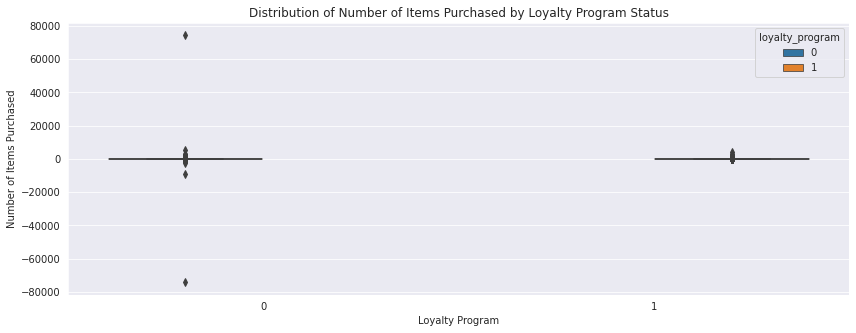

In [23]:
plt.figure(figsize=(14, 5))

sns.set_style('darkgrid')
ax = sns.boxplot(x='loyalty_program', y='quantity', hue = 'loyalty_program', data=df_merged)


plt.title('Distribution of Number of Items Purchased by Loyalty Program Status')
plt.xlabel('Loyalty Program')
plt.ylabel('Number of Items Purchased')

plt.show()

There are clearly outlier found on quantity of items purchased by non-loyalty program customer, up to 80000 (approximately) items purchased and up to 80000 (approximately) items returned (-80000).

Fitered the data for further outlier checking.

In [24]:
df_merged[(df_merged['quantity'] > 20000) | (df_merged['quantity'] < -20000)]

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price
49166,C541433,23166,-74216,2017-01-18 10:17:00,18025.0,0,Shop 21,1.04,-77184.64
68612,541431,23166,74214,2017-01-18 10:01:00,18025.0,0,Shop 15,1.04,77182.56


The outlier quantity come from one `customer_id` and have the same exact detail : `item_id`, `quantity`, and `price_per_one`. However, the activity are at two different shop, and slightly have different time (on the same day & time, but there are 16 minutes different).

This might be considered as anomaly on the data, thus, this outlier will be removed.

Removing outlier by determining Lower whisker and Upper whisker.

In [25]:
Q1  = df_merged['quantity'].quantile(0.25)
Q3  = df_merged['quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR

Filter the data based on the Lower whisker and Upper whisker.

Lower Whisker : -10.5
Upper Whisker : 17.5


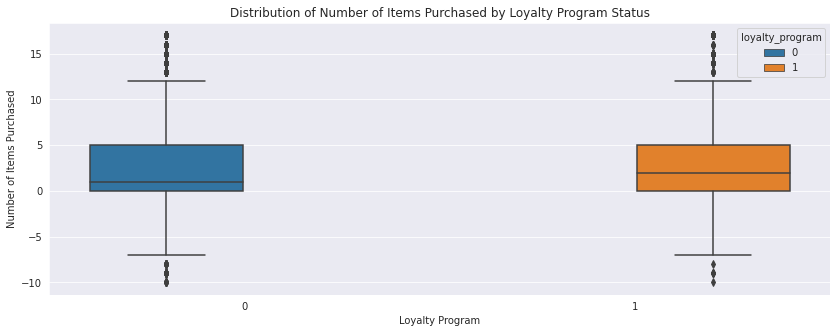

In [26]:
df_merged = df_merged[(df_merged['quantity'] < upper_whisker) & (df_merged['quantity'] > lower_whisker)].reset_index(drop=True)

print('Lower Whisker :', lower_whisker)
print('Upper Whisker :', upper_whisker)

plt.figure(figsize=(14, 5))

sns.set_style('darkgrid')
ax = sns.boxplot(x='loyalty_program', y='quantity', hue = 'loyalty_program', data=df_merged)


plt.title('Distribution of Number of Items Purchased by Loyalty Program Status')
plt.xlabel('Loyalty Program')
plt.ylabel('Number of Items Purchased')

plt.show()

### Revenue Analysis

Checking total revenue of each shop ID using filtered data.

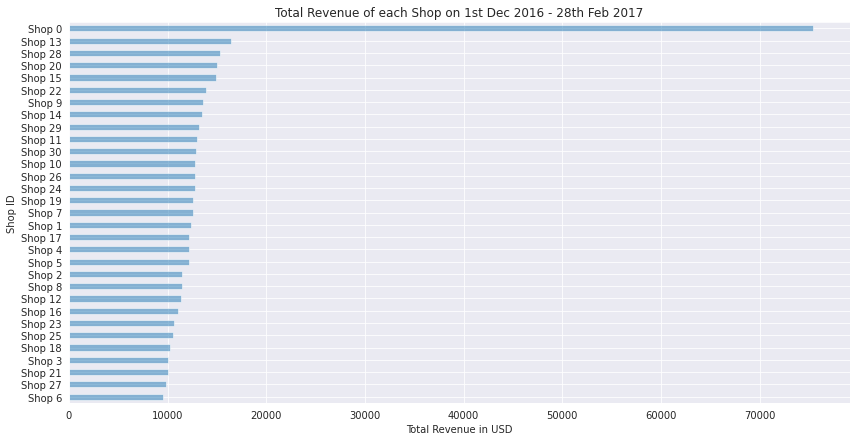

In [27]:
plt.figure(figsize=(14, 7))

shop_id = df_merged.groupby('shop_id')['total_price'].sum().sort_values(ascending=False)

ax = shop_id.plot(kind='barh', alpha=0.5, x='shop_id', grid= True)

plt.title('Total Revenue of each Shop on 1st Dec 2016 - 28th Feb 2017')
plt.xlabel('Total Revenue in USD')
plt.ylabel('Shop ID')

ax.invert_yaxis()

plt.show()

On the graph above, it clearly shows that `Shop 0` outperforms the other shops, that the total revenue reachs above `$70000`, while the other shops do not even reach `$20000` of total revenue.

Checking `Shop 0` detail distribution for furter analysis.

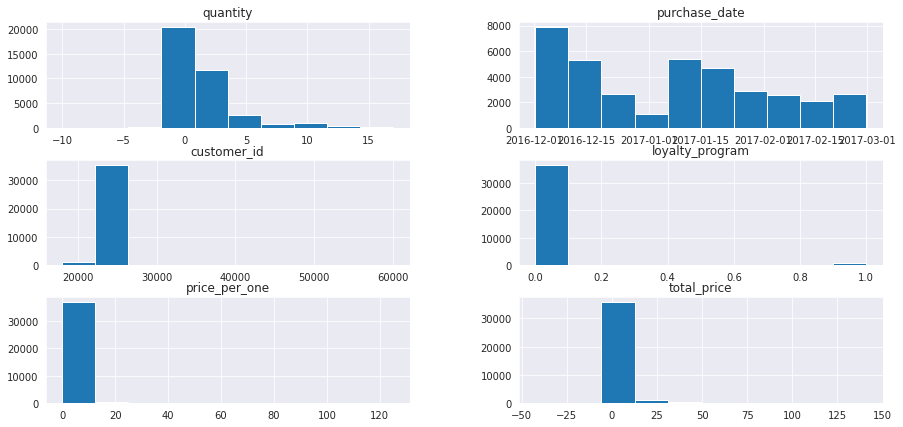

In [28]:
df_merged[df_merged['shop_id'] == 'Shop 0'].hist(figsize = (15,7))
plt.show()

Checking bottom four shops detail distribution for furter analysis and comparison to `Shop 0`.

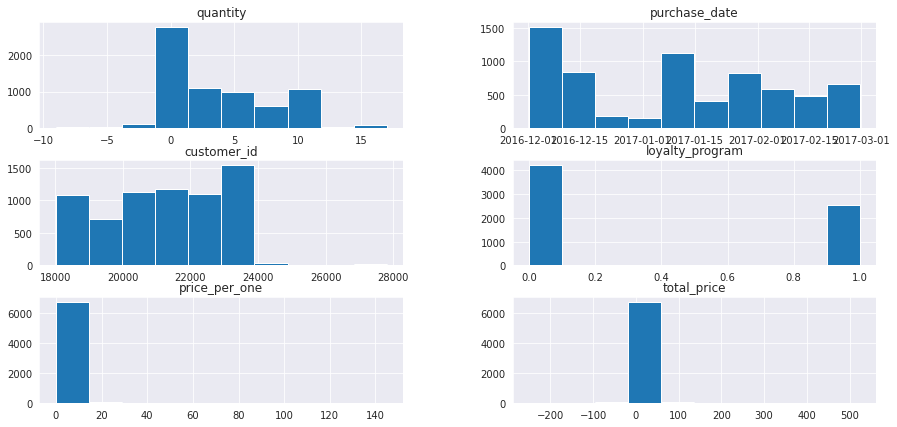

In [29]:
bottom_shop = df_merged[df_merged['shop_id'].isin(['Shop 3', 'Shop 21', 'Shop 27', 'Shop 26'])]
bottom_shop.hist(figsize = (15,7))
plt.show()

Findings of distribution comparison between `Shop 0` and the four stores with the lowest revenue:
1. There are no big difference on date & time, and also range of price of items purchased by customer
2. There is a purchasing trend during the holiday period (Christmas & New Year Holiday) on both graphs, that there is a decrease in purchase activity, but it improves again in the mid-January
3. Number of returned items (minus quantity) in Shop 0 are slightly lower than number of returned items in the bottom four shop
4. Refund amount in the bottom four shop (`total_price` column with minus value), are much higher, up to `$200`, compare to Shop 0 that only has highest refund in range `$50`
5. Shop 0 only has very few customers with loyalty program, compare to bottom four shop that half of total customers are from loyalty program

This initial findings reveal that loyalty program does not have a siginificant impact in terms of improving stores' revenue, instead number of customers likely has a direct impact in improving the revenue, as Shop 0 seems has much more customers than the other shops on the graphs above.  

Hence, it is important to check detail number of customers in the stores, that grouped by the loyalty program.

### Number of Customers

Checking number of customers in the four stores with lowest revenue :

Total Number of Customers in 4 Stores with Lowest Revenue: loyalty_program
0    234
1    131
Name: customer_id, dtype: int64


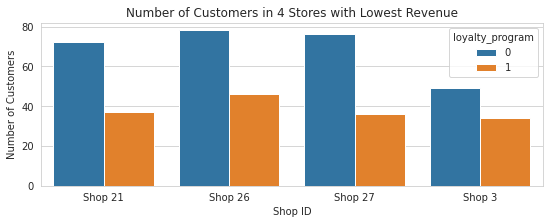

In [30]:
print('Total Number of Customers in 4 Stores with Lowest Revenue:', bottom_shop.groupby('loyalty_program')['customer_id'].nunique())

sns.set_style('whitegrid')
plt.figure(figsize=(9, 3))
customer_counts = bottom_shop.groupby(['loyalty_program', 'shop_id'])['customer_id'].nunique().reset_index(name='nunique')

ax = sns.barplot(x='shop_id', y='nunique', hue='loyalty_program', data=customer_counts)

plt.title('Number of Customers in 4 Stores with Lowest Revenue')

plt.xlabel('Shop ID')
plt.ylabel('Number of Customers')
plt.show()

Checking number of customers in Shop 0 :

Total Number of Customers in Shop 0: loyalty_program
0    637
1     40
Name: customer_id, dtype: int64


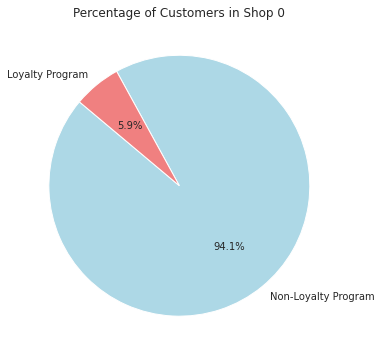

In [31]:
loyalty_counts = df_merged[df_merged['shop_id'] == 'Shop 0'].groupby('loyalty_program')['customer_id'].nunique()
print('Total Number of Customers in Shop 0:', loyalty_counts)

labels = ['Non-Loyalty Program', 'Loyalty Program']

colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(loyalty_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Percentage of Customers in Shop 0')

plt.show()

As it is estimated before that Shop 0 has much more number of customer compare to the number of customer at the other four stores (in total) with lowest revenue. And it is found that there are difference in loyaty program customer distribution, as there are only 5.9% of customer in Shop 0 are from loyalty program, meanwhile there are 35.9% of customer in the four stores (in total) are from loyalty program. It seems that loyalty program does not effect the stores revenue, instead total of number of customer itself, both from loyalty program or not, strongly effect the stores revenue.

### Exploring Correlation

Checking correlation of the data to figure out if there is any feature that might effect the other features.

In [32]:
df_merged.corr()

,quantity,customer_id,loyalty_program,price_per_one,total_price
quantity,1.000000,-0.304832,0.054732,-0.122311,0.517184
customer_id,-0.304832,1.000000,0.160424,-0.047718,-0.202182
loyalty_program,0.054732,0.160424,1.000000,0.014333,0.035082
price_per_one,-0.122311,-0.047718,0.014333,1.000000,0.228245
total_price,0.517184,-0.202182,0.035082,0.228245,1.000000


<Figure size 864x720 with 0 Axes>

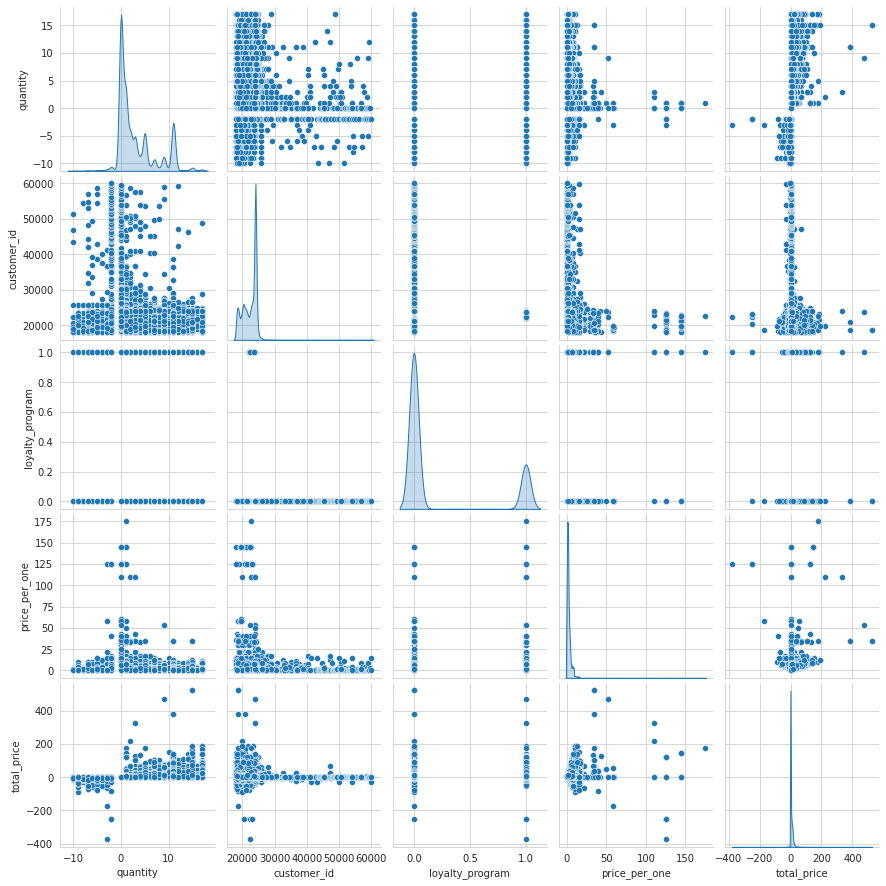

In [33]:
plt.figure(figsize=(12, 10))

sns.pairplot(df_merged, diag_kind='kde') 

plt.show()

As it is shown on the graph and table correlation above, there is no any strong correlation found between each feature and another.

### Loyalty Program Analysis

Checking distribution of price of item purchased based on Loyalty Program Status of the customers.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


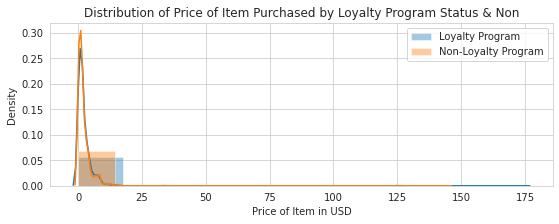

Loyalty Program :  count    20701.000000
mean         2.299678
std          4.591786
min          0.000000
25%          0.650000
50%          1.450000
75%          2.950000
max        175.000000
Name: price_per_one, dtype: float64

Non-Loyalty Program :  count    72521.000000
mean         2.165310
std          3.673268
min          0.000000
25%          0.640000
50%          1.450000
75%          2.550000
max        145.000000
Name: price_per_one, dtype: float64


In [34]:
plt.figure(figsize=(9, 3))

loyal = df_merged[df_merged['loyalty_program'] == 1]
non_loyal = df_merged[df_merged['loyalty_program'] == 0]

sns.distplot(loyal['price_per_one'], bins=10, label='Loyalty Program')
sns.distplot(non_loyal['price_per_one'], bins=10, label='Non-Loyalty Program')

plt.title('Distribution of Price of Item Purchased by Loyalty Program Status & Non')

plt.xlabel('Price of Item in USD') 

plt.ylabel('Density')

plt.legend()

plt.show()

print('Loyalty Program : ',loyal['price_per_one'].describe())
print()
print('Non-Loyalty Program : ',non_loyal['price_per_one'].describe())

The graph above shows identical result of range of price items purchased by loyalty program customers and the non one. However it reveals that the most expensive item purchased by loyalty program customers costs `$175`, `$30` more pricey than the most expensive item purchased by non-loyalty program customers, which is only slightly different.

Checking daily purchasing trend based on loyalty program status of customers.

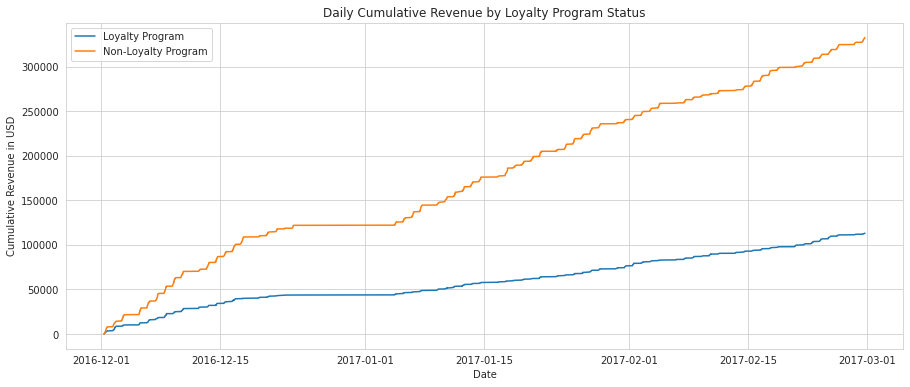

In [35]:
loyalty_program_1 = df_merged[df_merged['loyalty_program'] == 1].groupby('purchase_date')['total_price'].sum()
loyalty_program_0 = df_merged[df_merged['loyalty_program'] == 0].groupby('purchase_date')['total_price'].sum()

cumulative_revenue_1 = loyalty_program_1.cumsum()
cumulative_revenue_0 = loyalty_program_0.cumsum()

plt.figure(figsize=(15, 6))
plt.plot(cumulative_revenue_1.index, cumulative_revenue_1, label='Loyalty Program')
plt.plot(cumulative_revenue_0.index, cumulative_revenue_0, label='Non-Loyalty Program')

plt.xlabel('Date')
plt.ylabel('Cumulative Revenue in USD')
plt.title('Daily Cumulative Revenue by Loyalty Program Status')
plt.legend()

plt.grid(True)
plt.show()

Based on daily cumulative revenue above, total revenue from non-loyalty program customer clearly outperforms total revenue from loyalty program customer. However, there is similarity found, as during Christmas & New Year holiday, both non-loyalty program customer and loyalty one do not make significant purchase as the revenue does not improve during this period of time.

## Hypothesis Testing

### Quantity of Items Purchased by Loyal Program

Checking the distribution of quantity of items purchased by non-loyal program customer and loyal one.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


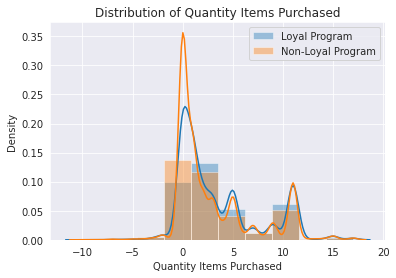

In [36]:
loyal = df_merged['quantity'][df_merged['loyalty_program'] == 1]
non_loyal = df_merged['quantity'][df_merged['loyalty_program'] == 0] 

sns.set_style('darkgrid')
sns.distplot(loyal, bins=10, label='Loyal Program')
sns.distplot(non_loyal, bins=10, label='Non-Loyal Program')

plt.title('Distribution of Quantity Items Purchased')

plt.xlabel('Quantity Items Purchased')
plt.ylabel('Density')

plt.legend()

plt.show()

From the graph above, it seems that there is no signficance difference of each groups, but the distribution of the data does not seem normal. However, to provide statistically test result, hypothesis testing need to be conducted. 

Checking distribution of the data by conducting Shapiro Test, with hypothesis as follow :

H0 = p-value > alpha : Quantity distribution is normal

H1 = p-value < alpha : Quantity distribution is not normal

In [37]:
alpha = 0.05 

results = st.shapiro(df_merged['quantity'])
p_value = results[1] 

print('p-value: ', p_value)

if (p_value < alpha):
    print("Null Hypothesis rejected: quantity distribution is not normal")
else:
    print("There is no enough evidence to reject Null Hypothesis: quantity distribution is normal")

p-value:  0.0
Null Hypothesis rejected: quantity distribution is not normal


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Considering distribution of quantity is not normal, we will conduct the hypothesis testing using Mann-Whitney testing, to examine following hypothesis :

Alpha = 0.05

H0 = p-value > alpha : There is no statistic significance difference found between quantity of items purchased by non-loyal program customer and loyal one.

H1 = p-value < alpha : There is statistic significance difference found between quantity of items purchased by non-loyal program customer and loyal one.

In [38]:
print('Quantity Difference (p-value): ',format(stats.mannwhitneyu(loyal, non_loyal)[1]))

print('Relative Quantity  : ', "{0:.3f}".format(non_loyal.mean()/loyal.mean()-1))

Quantity Difference (p-value):  3.99253427057577e-121
Relative Quantity  :  -0.153


P-value is lower than alpha means we have enough evidence to reject the Null Hypothesis. It reveals that there is statistic significance difference of quantity of items purchased by non-loyal program customer and loyal one. And it is found that relative of quantity of items purchased by loyal program customer is 15% higher than non-loyal one. 

### Quantity of Items Purchased by Shop ID

We will conduct the hypothesis testing using Mann-Whitney testing, to examine following hypothesis :

Alpha = 0.05

H0 = p-value > alpha : There is no statistic significance difference found between quantity of items purchased at selected Shop ID.

H1 = p-value < alpha : There is statistic significance difference found between quantity of items purchased at selected Shop ID.

Make a variable for top five stores with highest revenue (excluding Shop 0, as it has number of rows that is multiple times greater than other, to avoid unevenness).

In [47]:
top_shop = df_merged[df_merged['shop_id'].isin(['Shop 13', 'Shop 28', 'Shop 20', 'Shop 15'])]
print('Total Row of Top Stores : ', top_shop.shape[0])
top_shop['shop_id'].value_counts()

Total Row of Top Stores :  8263


Shop 15    2245
Shop 20    2041
Shop 13    2039
Shop 28    1938
Name: shop_id, dtype: int64

Checking total of rows of bottom four stores with lowest revenue.

In [48]:
print('Total Row of Top Stores : ', bottom_shop.shape[0])
bottom_shop['shop_id'].value_counts()

Total Row of Top Stores :  6777


Shop 26    2040
Shop 27    1903
Shop 21    1452
Shop 3     1382
Name: shop_id, dtype: int64

As each groups turn out to have quite even total of rows, hypothesis testing is conducted :

In [41]:
print('Quantity Difference (p-value): ',format(stats.mannwhitneyu(top_shop['quantity'], bottom_shop['quantity'])[1]))

print('Relative Quantity  : ', "{0:.3f}".format(bottom_shop['quantity'].mean()/top_shop['quantity'].mean()-1))

Quantity Difference (p-value):  4.1311285394247506e-10
Relative Quantity  :  -0.107


P-value is lower than alpha means we have enough evidence to reject the Null Hypothesis. It reveals that there is statistic significance difference found of quantity of items purchased at the stores with highest revenue compare to the stores with lowest revenue, with the relative quantity of items purchased at the stores with highest revenue is 11% higher than quantity of items purchased at the stores with lowest revenue.

## Conclusion

This project aims to evaluate the stores performance appraisal, to figure out any aspects might need to be improved, particularly for the stores with the least performance appraisal. 

Initial stage on this project involves data preprocessing : fixing name of the columns, fixing type of the data, removing duplicated values, and filling in missing values with unique value for each rows in column `customer_id`. From the data analysis exploration, several points were identified, as follow:
- There is outlier found in column `quantity` that contain in two rows of the data. Considered as anomaly of the data these two rows are removed
- Out of 31 stores contain on the data, one store (Shop 0) strongly outperforms total revenue of the other stores: that the total revenue reachs above `$70000`, while the other shops do not even reach `$20000` of total revenue, due to number of customer that is much larger than the other stores
- There is no correlation found among each features and another
- Loyalty program does not effect the stores revenue, instead total of number of customer itself

The next step is to conduct hypothesis testing to examine following hypothesis :

1. There is statistic significance difference found between quantity of items purchased by non-loyal program customer and loyal one.

Result : There is statistic significance difference of quantity of items purchased by non-loyal program customer and loyal one, with the relative of quantity of items purchased by loyal program customer is 15% higher than non-loyal one.

2. There is statistic significance difference found between quantity of items purchased at selected Shop ID.

Result : There is statistic significance difference found of quantity of items purchased at the stores with highest revenue compare to the stores with lowest revenue, with the relative quantity of items purchased is 11% higher.

Based on these findings, to improve their revenue, stores can consider the following actions:

- Loyalty Program: Continue to promote and enhance the loyalty program to attract and retain more customers. Consider offering exclusive benefits, discounts, or rewards to loyal program members to further encourage higher spending.

- Inventory Management: Ensure that the stores maintain a well-balanced inventory that aligns with customer preferences and demand. Avoid overstocking or understocking items, which can affect sales.

- Marketing and Promotions: Implement targeted marketing and promotional campaigns to attract more customers to all stores. Consider offering special promotions, discounts, or seasonal offers to boost sales.

Link to Tableau: [Retail Dashbord](https://public.tableau.com/views/RetailShop2/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)